In [1]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt

import nltk
from wordcloud import WordCloud
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from ekphrasis.classes.segmenter import Segmenter

df=pd.read_csv('tweets.csv')
df.head(20)

[nltk_data] Downloading package wordnet to /home/dhaya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dhaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,author_id,like_count,link,quote_count,reply_count,retweet_count,tweet_body,tweet_id,tweeted_at
0,1,16973333,0,https://twitter.com/16973333/status/1373631143...,0,0,1,Opinion: It’s 15 years since Twitter launched ...,1373631143325622272,2021-03-21T13:42:40.000Z
1,2,1652541,17,https://twitter.com/1652541/status/13736305196...,1,0,1,Mideast stocks: Major Gulf markets ease in ear...,1373630519670345741,2021-03-21T13:40:11.000Z
2,3,807095,72,https://twitter.com/807095/status/137363048084...,11,16,40,New York has reported its first confirmed case...,1373630480843743234,2021-03-21T13:40:02.000Z
3,4,1652541,48,https://twitter.com/1652541/status/13736304730...,1,0,15,ICYMI: 'Beyond Walls' artist Saype spray-paint...,1373630473008726016,2021-03-21T13:40:00.000Z
4,5,25049056,4,https://twitter.com/25049056/status/1373629861...,0,0,2,Saudi Aramco reports $49bn profit slump in 202...,1373629861009395716,2021-03-21T13:37:34.000Z
5,6,788524,4,https://twitter.com/788524/status/137362938255...,0,0,1,Outdoor shows and decoy audiences herald retur...,1373629382556798978,2021-03-21T13:35:40.000Z
6,7,16973333,10,https://twitter.com/16973333/status/1373629381...,0,1,6,Women hold the key to tackling climate change ...,1373629381722128386,2021-03-21T13:35:40.000Z
7,8,1652541,57,https://twitter.com/1652541/status/13736292600...,1,5,20,Germany considers compulsory quarantines for p...,1373629260087369731,2021-03-21T13:35:11.000Z
8,9,5988062,28,https://twitter.com/5988062/status/13736289734...,1,6,11,Senior Chinese officials have thrust themselve...,1373628973410885635,2021-03-21T13:34:02.000Z
9,10,759251,269,https://twitter.com/759251/status/137362823377...,13,20,67,"A ""Star Wars"" fan in Russia built a 45-foot-lo...",1373628233778888711,2021-03-21T13:31:06.000Z


In [3]:
import numpy as np
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

np.random.seed(400)

In [5]:
df_clean=pd.DataFrame()
df_clean['content'] = df.tweet_body.str.lower()
df_clean.head()

,content
0,opinion: it’s 15 years since twitter launched ...
1,mideast stocks: major gulf markets ease in ear...
2,new york has reported its first confirmed case...
3,icymi: 'beyond walls' artist saype spray-paint...
4,saudi aramco reports $49bn profit slump in 202...


In [6]:
df_clean.content = df_clean.content.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
df_clean.content.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
df_clean.head()

,content
0,opinion: it’s 15 years since twitter launched ...
1,mideast stocks: major gulf markets ease in ear...
2,new york has reported its first confirmed case...
3,icymi: 'beyond walls' artist saype spray-paint...
4,saudi aramco reports $49bn profit slump in 2020


In [7]:
df_clean.content = df_clean.content.apply(lambda x: re.sub(r'@[a-z0-9]*', '', x))
df_clean.head(10)

,content
0,opinion: it’s 15 years since twitter launched ...
1,mideast stocks: major gulf markets ease in ear...
2,new york has reported its first confirmed case...
3,icymi: 'beyond walls' artist saype spray-paint...
4,saudi aramco reports $49bn profit slump in 2020
5,outdoor shows and decoy audiences herald retur...
6,women hold the key to tackling climate change ...
7,germany considers compulsory quarantines for p...
8,senior chinese officials have thrust themselve...
9,"a ""star wars"" fan in russia built a 45-foot-lo..."


In [8]:
df_clean.content = df_clean.content.apply(lambda x: re.sub(r"[^a-z0-9\s\(\-:\)\\\/\];='#]", '', x))
df_clean.head(10)

,content
0,opinion: its 15 years since twitter launched ...
1,mideast stocks: major gulf markets ease in ear...
2,new york has reported its first confirmed case...
3,icymi: 'beyond walls' artist saype spray-paint...
4,saudi aramco reports 49bn profit slump in 2020
5,outdoor shows and decoy audiences herald retur...
6,women hold the key to tackling climate change ...
7,germany considers compulsory quarantines for p...
8,senior chinese officials have thrust themselve...
9,a star wars fan in russia built a 45-foot-long...


In [9]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
df_clean['tokens'] = df_clean['content'].apply(tknzr.tokenize)
df_clean.head(10)

,content,tokens
0,opinion: its 15 years since twitter launched ...,"[opinion, :, its, 15, years, since, twitter, l..."
1,mideast stocks: major gulf markets ease in ear...,"[mideast, stocks, :, major, gulf, markets, eas..."
2,new york has reported its first confirmed case...,"[new, york, has, reported, its, first, confirm..."
3,icymi: 'beyond walls' artist saype spray-paint...,"[icymi, :, ', beyond, walls, ', artist, saype,..."
4,saudi aramco reports 49bn profit slump in 2020,"[saudi, aramco, reports, 49bn, profit, slump, ..."
5,outdoor shows and decoy audiences herald retur...,"[outdoor, shows, and, decoy, audiences, herald..."
6,women hold the key to tackling climate change ...,"[women, hold, the, key, to, tackling, climate,..."
7,germany considers compulsory quarantines for p...,"[germany, considers, compulsory, quarantines, ..."
8,senior chinese officials have thrust themselve...,"[senior, chinese, officials, have, thrust, the..."
9,a star wars fan in russia built a 45-foot-long...,"[a, star, wars, fan, in, russia, built, a, 45,..."


In [10]:
PUNCUATION_LIST = list(string.punctuation)
def remove_punctuation(word_list):
    """Remove punctuation tokens from a list of tokens"""
    return [w for w in word_list if w not in PUNCUATION_LIST]
df_clean['tokens'] = df_clean['tokens'].apply(remove_punctuation)
df_clean.head(10)

,content,tokens
0,opinion: its 15 years since twitter launched ...,"[opinion, its, 15, years, since, twitter, laun..."
1,mideast stocks: major gulf markets ease in ear...,"[mideast, stocks, major, gulf, markets, ease, ..."
2,new york has reported its first confirmed case...,"[new, york, has, reported, its, first, confirm..."
3,icymi: 'beyond walls' artist saype spray-paint...,"[icymi, beyond, walls, artist, saype, spray-pa..."
4,saudi aramco reports 49bn profit slump in 2020,"[saudi, aramco, reports, 49bn, profit, slump, ..."
5,outdoor shows and decoy audiences herald retur...,"[outdoor, shows, and, decoy, audiences, herald..."
6,women hold the key to tackling climate change ...,"[women, hold, the, key, to, tackling, climate,..."
7,germany considers compulsory quarantines for p...,"[germany, considers, compulsory, quarantines, ..."
8,senior chinese officials have thrust themselve...,"[senior, chinese, officials, have, thrust, the..."
9,a star wars fan in russia built a 45-foot-long...,"[a, star, wars, fan, in, russia, built, a, 45,..."


In [11]:
def hashtag_extraction(word_list):
    return [w for w in word_list if w[0]=='#']



In [12]:
df_clean['hashtags']=df_clean['tokens'].apply(hashtag_extraction)
df_clean.head(20)

,content,tokens,hashtags
0,opinion: its 15 years since twitter launched ...,"[opinion, its, 15, years, since, twitter, laun...",[]
1,mideast stocks: major gulf markets ease in ear...,"[mideast, stocks, major, gulf, markets, ease, ...",[]
2,new york has reported its first confirmed case...,"[new, york, has, reported, its, first, confirm...",[]
3,icymi: 'beyond walls' artist saype spray-paint...,"[icymi, beyond, walls, artist, saype, spray-pa...",[]
4,saudi aramco reports 49bn profit slump in 2020,"[saudi, aramco, reports, 49bn, profit, slump, ...",[]
5,outdoor shows and decoy audiences herald retur...,"[outdoor, shows, and, decoy, audiences, herald...",[]
6,women hold the key to tackling climate change ...,"[women, hold, the, key, to, tackling, climate,...",[]
7,germany considers compulsory quarantines for p...,"[germany, considers, compulsory, quarantines, ...",[]
8,senior chinese officials have thrust themselve...,"[senior, chinese, officials, have, thrust, the...",[]
9,a star wars fan in russia built a 45-foot-long...,"[a, star, wars, fan, in, russia, built, a, 45,...",[]


In [13]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemmatize_text(text):
 return [(lemmatizer.lemmatize(w)) for w in \
                                     w_tokenizer.tokenize((text))]

In [14]:
stop_words = set(stopwords.words('english'))
df_clean['tokens'] = df_clean['tokens'].apply(lambda x: [item for item in x if item not in stop_words])
df_clean.head(20)

,content,tokens,hashtags
0,opinion: its 15 years since twitter launched ...,"[opinion, 15, years, since, twitter, launched,...",[]
1,mideast stocks: major gulf markets ease in ear...,"[mideast, stocks, major, gulf, markets, ease, ...",[]
2,new york has reported its first confirmed case...,"[new, york, reported, first, confirmed, case, ...",[]
3,icymi: 'beyond walls' artist saype spray-paint...,"[icymi, beyond, walls, artist, saype, spray-pa...",[]
4,saudi aramco reports 49bn profit slump in 2020,"[saudi, aramco, reports, 49bn, profit, slump, ...",[]
5,outdoor shows and decoy audiences herald retur...,"[outdoor, shows, decoy, audiences, herald, ret...",[]
6,women hold the key to tackling climate change ...,"[women, hold, key, tackling, climate, change, ...",[]
7,germany considers compulsory quarantines for p...,"[germany, considers, compulsory, quarantines, ...",[]
8,senior chinese officials have thrust themselve...,"[senior, chinese, officials, thrust, warring, ...",[]
9,a star wars fan in russia built a 45-foot-long...,"[star, wars, fan, russia, built, 45, foot-long...",[]


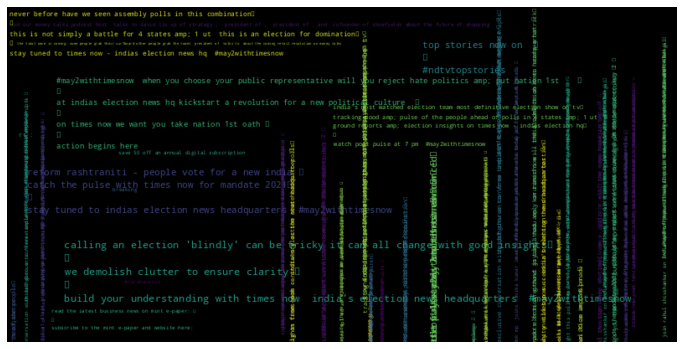

In [15]:
fdist = FreqDist(df_clean['content'])
#WordCloud
wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
processed_docs = df_clean['tokens']
processed_docs[:10]


0    [opinion, 15, years, since, twitter, launched,...
1    [mideast, stocks, major, gulf, markets, ease, ...
2    [new, york, reported, first, confirmed, case, ...
3    [icymi, beyond, walls, artist, saype, spray-pa...
4    [saudi, aramco, reports, 49bn, profit, slump, ...
5    [outdoor, shows, decoy, audiences, herald, ret...
6    [women, hold, key, tackling, climate, change, ...
7    [germany, considers, compulsory, quarantines, ...
8    [senior, chinese, officials, thrust, warring, ...
9    [star, wars, fan, russia, built, 45, foot-long...
Name: tokens, dtype: object

In [17]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 15
1 launched
2 opinion
3 ready
4 since
5 still
6 twitter
7 years
8 aramco
9 early
10 ease


In [18]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

In [19]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [20]:
'''
Preview BOW for our sample preprocessed document
'''
document_num = 20
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 145 ("face") appears 1 time.
Word 154 ("13") appears 1 time.
Word 155 ("best") appears 1 time.


In [21]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 8, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [22]:

'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.024*"india" + 0.023*"read" + 0.017*"indias" + 0.015*"story" + 0.013*"police" + 0.008*"mandate" + 0.008*"said" + 0.008*"england" + 0.007*"calling" + 0.007*"ensure"


Topic: 1 
Words: 0.022*"vaccine" + 0.008*"astrazeneca" + 0.008*"report" + 0.008*"hours" + 0.008*"use" + 0.008*"us" + 0.008*"says" + 0.007*"million" + 0.007*"covid" + 0.007*"according"


Topic: 2 
Words: 0.027*"cases" + 0.019*"case" + 0.019*"details" + 0.015*"maharashtra" + 0.013*"#covid19" + 0.010*"rs" + 0.009*"covid" + 0.009*"kumar" + 0.008*"#coronavirus" + 0.008*"scare"


Topic: 3 
Words: 0.062*"election" + 0.043*"#may2withtimesnow" + 0.042*"times" + 0.042*"amp" + 0.034*"news" + 0.025*"polls" + 0.019*"india's" + 0.018*"1" + 0.017*"pulse" + 0.016*"ground"


Topic: 4 
Words: 0.024*"bjp" + 0.024*"minister" + 0.019*"bengal" + 0.016*"said" + 0.013*"west" + 0.012*"party" + 0.012*"tmc" + 0.012*"congress" + 0.012*"government" + 0.011*"chief"


Topic: 5 
Words: 0.024*"pm" + 0.020*"india" + 0.017*"rahul" + 0.013*